Полезности:

* Метод merge датафрейма
* Метод apply серий
* Метод select_dtypes датафрейма
* Метод filter датафрейма
* Методы drop и drop_duplicates датафрейма
* Метод pivot и pivot_table датафрейма
* и любые другие

In [ ]:
!pip install -U pip
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 23.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 55.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc, rcParams, gridspec
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import math

In [2]:
!git clone -b HW5 --single-branch https://github.com/checheanya/Python_BI_2022

fatal: destination path 'Python_BI_2022' already exists and is not an empty directory.


In [ ]:
!head -10 ./Python_BI_2022/HW5/data/alignment.bed

Reference_1	197681	200286	NODE_1445_length_2603_cov_1135.593799	41	-
Reference_1	202886	202996	NODE_19543_length_110_cov_1549.290909	0	-
Reference_1	202941	203377	NODE_5666_length_436_cov_418.653543	16	+
Reference_1	203322	785222	NODE_25_length_581906_cov_146.024228	60	+
Reference_1	785169	1763981	NODE_11_length_978812_cov_132.517515	60	-
Reference_1	1763926	1764363	NODE_5666_length_436_cov_418.653543	0	-
Reference_1	1764308	1764418	NODE_19543_length_110_cov_1549.290909	0	+
Reference_1	1767018	1769623	NODE_1445_length_2603_cov_1135.593799	0	+
Reference_1	1769568	2034579	NODE_73_length_265111_cov_133.112263	60	+
Reference_1	2018035	2034640	NODE_778_length_16705_cov_121.032613	60	-


In [ ]:
!head -10 ./Python_BI_2022/HW5/data/rrna_annotation.gff

# gff3-format
Reference_10	barrnap:0.9	rRNA	67122	68652	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	68981	72061	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	469298	470826	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	471166	474246	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	3629599	3632680	0.0	-	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	3633020	3634549	0.0	-	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6168837	6170367	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6170707	6173787	0.0	+	.	Name=23S_rRNA;product=23S ribosomal RNA
Reference_10	barrnap:0.9	rRNA	6283193	6284716	0.0	+	.	Name=16S_rRNA;product=16S ribosomal RNA


## Задание 1. Работа с реальными данными (20 баллов)

#### Дано:
1) аннотация рибосомальной РНК некоторого метагеномного датасета в формате **GFF** (rrna_annotation.gff) \\
2) файл с выравниванием метагеномной сборки на этот же датасет в формате **BED** 6 (alignment.bed) \\

\\
#### Задачи:
1.   Датафреймы
- конвертация формата в датафрейм
- колонка с атрибутами - данные о типе рРНК одной короткой строкой (16S, 23S, 5S)

2.   Таблица по хромосомам (геномам) \\
Для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа

3.   Barplot, отображающий эти данные

4.   Таблица успешных РНК \\
Мы хотим узнать сколько рРНК в процессе сборки успешно собралось. В результате сохранятся только записи об рРНК, интервал которой перекрывался с интервалом контига в выравнивании, это означает, что это ген есть в сборке. Выведите таблицу, содержащую исходные записи об **рРНК** полностью вошедших в сборку (не фрагментом), а также запись о **контиге** в который эта РНК попала. Обратите внимание, что в один контиг может попасть несколько рРНК.

#### File to dataframe

In [ ]:
def read_gff(path):
    gff_dataframe = pd.read_table(path, names = [
        "chromosome", "source", "type", "start", "end", "score",
        "strand", "phase", "attributes"], skiprows = [0])  
    gff_dataframe["attributes"] = gff_dataframe["attributes"].apply(lambda x: x[5:x.find("S")+1])

    return gff_dataframe

In [ ]:
def read_bed6(path):
    bed_dataframe = pd.read_table(path, names = [
        "chromosome", "start", "end", "name", "score", "strand"]) 

    return bed_dataframe

In [ ]:
path = "./Python_BI_2022/HW5/data/alignment.bed"
df_bed = read_bed6(path)
df_bed.head()

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [ ]:
path = "./Python_BI_2022/HW5/data/rrna_annotation.gff"
df_gff = read_gff(path)
df_gff.head()

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


#### Table for the chromosomes

In [ ]:
df_chr_count = pd.pivot_table(df_gff, values='type', index='chromosome', columns='attributes', aggfunc='count')
df_chr_count.reset_index(inplace=True)
df_chr_count = df_chr_count.melt(id_vars = ["chromosome"], value_vars = ["16S", "23S", "5S"])
df_chr_count

,chromosome,attributes,value
0,Reference_1,16S,2.0
1,Reference_10,16S,5.0
2,Reference_11,16S,2.0
3,Reference_12,16S,2.0
4,Reference_13,16S,4.0
...,...,...,...
73,Reference_5,5S,6.0
74,Reference_6,5S,2.0
75,Reference_7,5S,8.0
76,Reference_8,5S,NaN


Barplot:

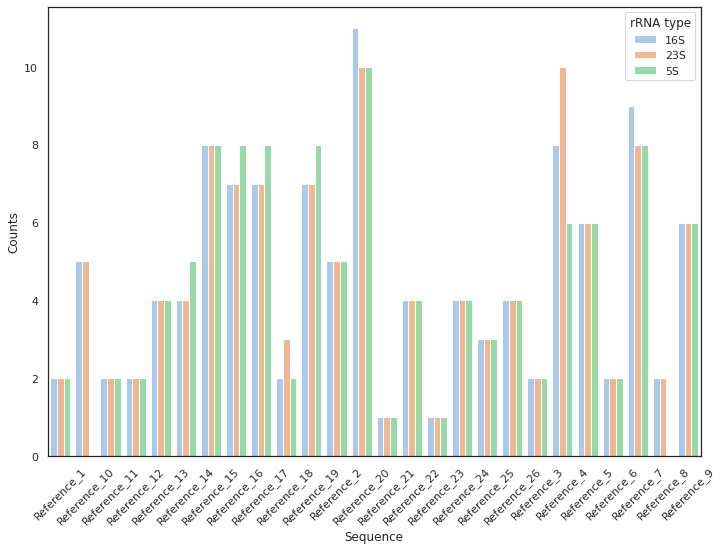

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="white", palette="pastel")
sns.barplot(x = df_chr_count["chromosome"], y = df_chr_count["value"],
            hue = df_chr_count["attributes"])
plt.ylabel("Counts")
plt.xlabel("Sequence")
plt.legend(title="rRNA type")
plt.xticks(rotation=45)
plt.show()

#### Overlaping RNA contigs

Для начала склеим два датасета так, что знчания аннотаций будут повторяться для всех вхождений каждой "хромосомы" в файл с ридами:

In [ ]:
merged_df = df_gff.merge(df_bed, left_on='chromosome', right_on='chromosome', suffixes=('_ann', '_read'))
merged_df.head()

,chromosome,source,type,start_ann,end_ann,score_ann,strand_ann,phase,attributes,start_read,end_read,name,score_read,strand_read
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-


In [ ]:
merged_df.shape

(126748, 14)

Теперь нужно отобрать только те строки этого датафрейма, где у нас весь интервал из аннотации попадает в интервал контига:

In [ ]:
rrna_full_cov = merged_df[(merged_df["start_ann"] >= merged_df["start_read"]) & 
          (merged_df["end_ann"] <= merged_df["end_read"])]
rrna_full_cov.head()

,chromosome,source,type,start_ann,end_ann,score_ann,strand_ann,phase,attributes,start_read,end_read,name,score_read,strand_read
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-


In [ ]:
rrna_full_cov.shape

(120, 14)

## Задание 2. Кастомизация графиков (20 баллов)

### Violin plot

In [ ]:
path = "./Python_BI_2022/HW5/data/diffexpr_data.tsv.gz"
diff_expr = pd.read_table(path)
diff_expr.head()

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,0.659033,1.0,-0.0
1,CELA2A,8.691414,0.582390,1.0,-0.0
2,CLPS,8.054078,0.651733,1.0,-0.0
3,MPO,7.817773,0.448334,1.0,-0.0
4,AMY2A,7.285231,0.632441,1.0,-0.0


In [ ]:
# adding column with significance statement
conditions = [
    (diff_expr['log_pval'] <= -math.log10(0.05)) & (diff_expr['logFC'] <= 0), # green
    (diff_expr['log_pval'] <= -math.log10(0.05)) & (diff_expr['logFC'] > 0), # red
    (diff_expr['log_pval'] > -math.log10(0.05)) & (diff_expr['logFC'] <= 0), # blue
    (diff_expr['log_pval'] > -math.log10(0.05)) & (diff_expr['logFC'] > 0) # orange
    ]

values = ['Non-significantly downregulated', 'Non-significantly upregulated',
          'Significantly downregulated', 'Significantly upregulated']
colors_dict = {'Significantly downregulated': "tab:blue", 'Significantly upregulated': "tab:orange",
               'Non-significantly downregulated': "tab:green", 'Non-significantly upregulated': "tab:red"}

diff_expr["significance"] = np.select(conditions, values)
diff_expr.head()

,Sample,logFC,pval,pval_corr,log_pval,significance
0,PNLIP,10.092524,0.659033,1.0,-0.0,Non-significantly upregulated
1,CELA2A,8.691414,0.582390,1.0,-0.0,Non-significantly upregulated
2,CLPS,8.054078,0.651733,1.0,-0.0,Non-significantly upregulated
3,MPO,7.817773,0.448334,1.0,-0.0,Non-significantly upregulated
4,AMY2A,7.285231,0.632441,1.0,-0.0,Non-significantly upregulated


In [ ]:
# top-2 genes selection
down_reg = diff_expr[diff_expr['significance'] == "Significantly downregulated"].sort_values(
                            by=['logFC']).head(2)
up_reg = diff_expr[diff_expr['significance'] == "Significantly upregulated"].sort_values(
                            by=['logFC']).tail(2)
top_2_total = pd.concat([down_reg, up_reg])
top_2_total.reset_index(inplace=True)

In [ ]:
# setting up theme parameters
sns.set_theme(style="ticks", font='sans-serif', rc={'figure.figsize': (10, 6)})
plt.rcParams['figure.dpi'] = 800
plt.rcParams['font.size'] = 3
plt.rcParams['font.weight'] = 'bold'

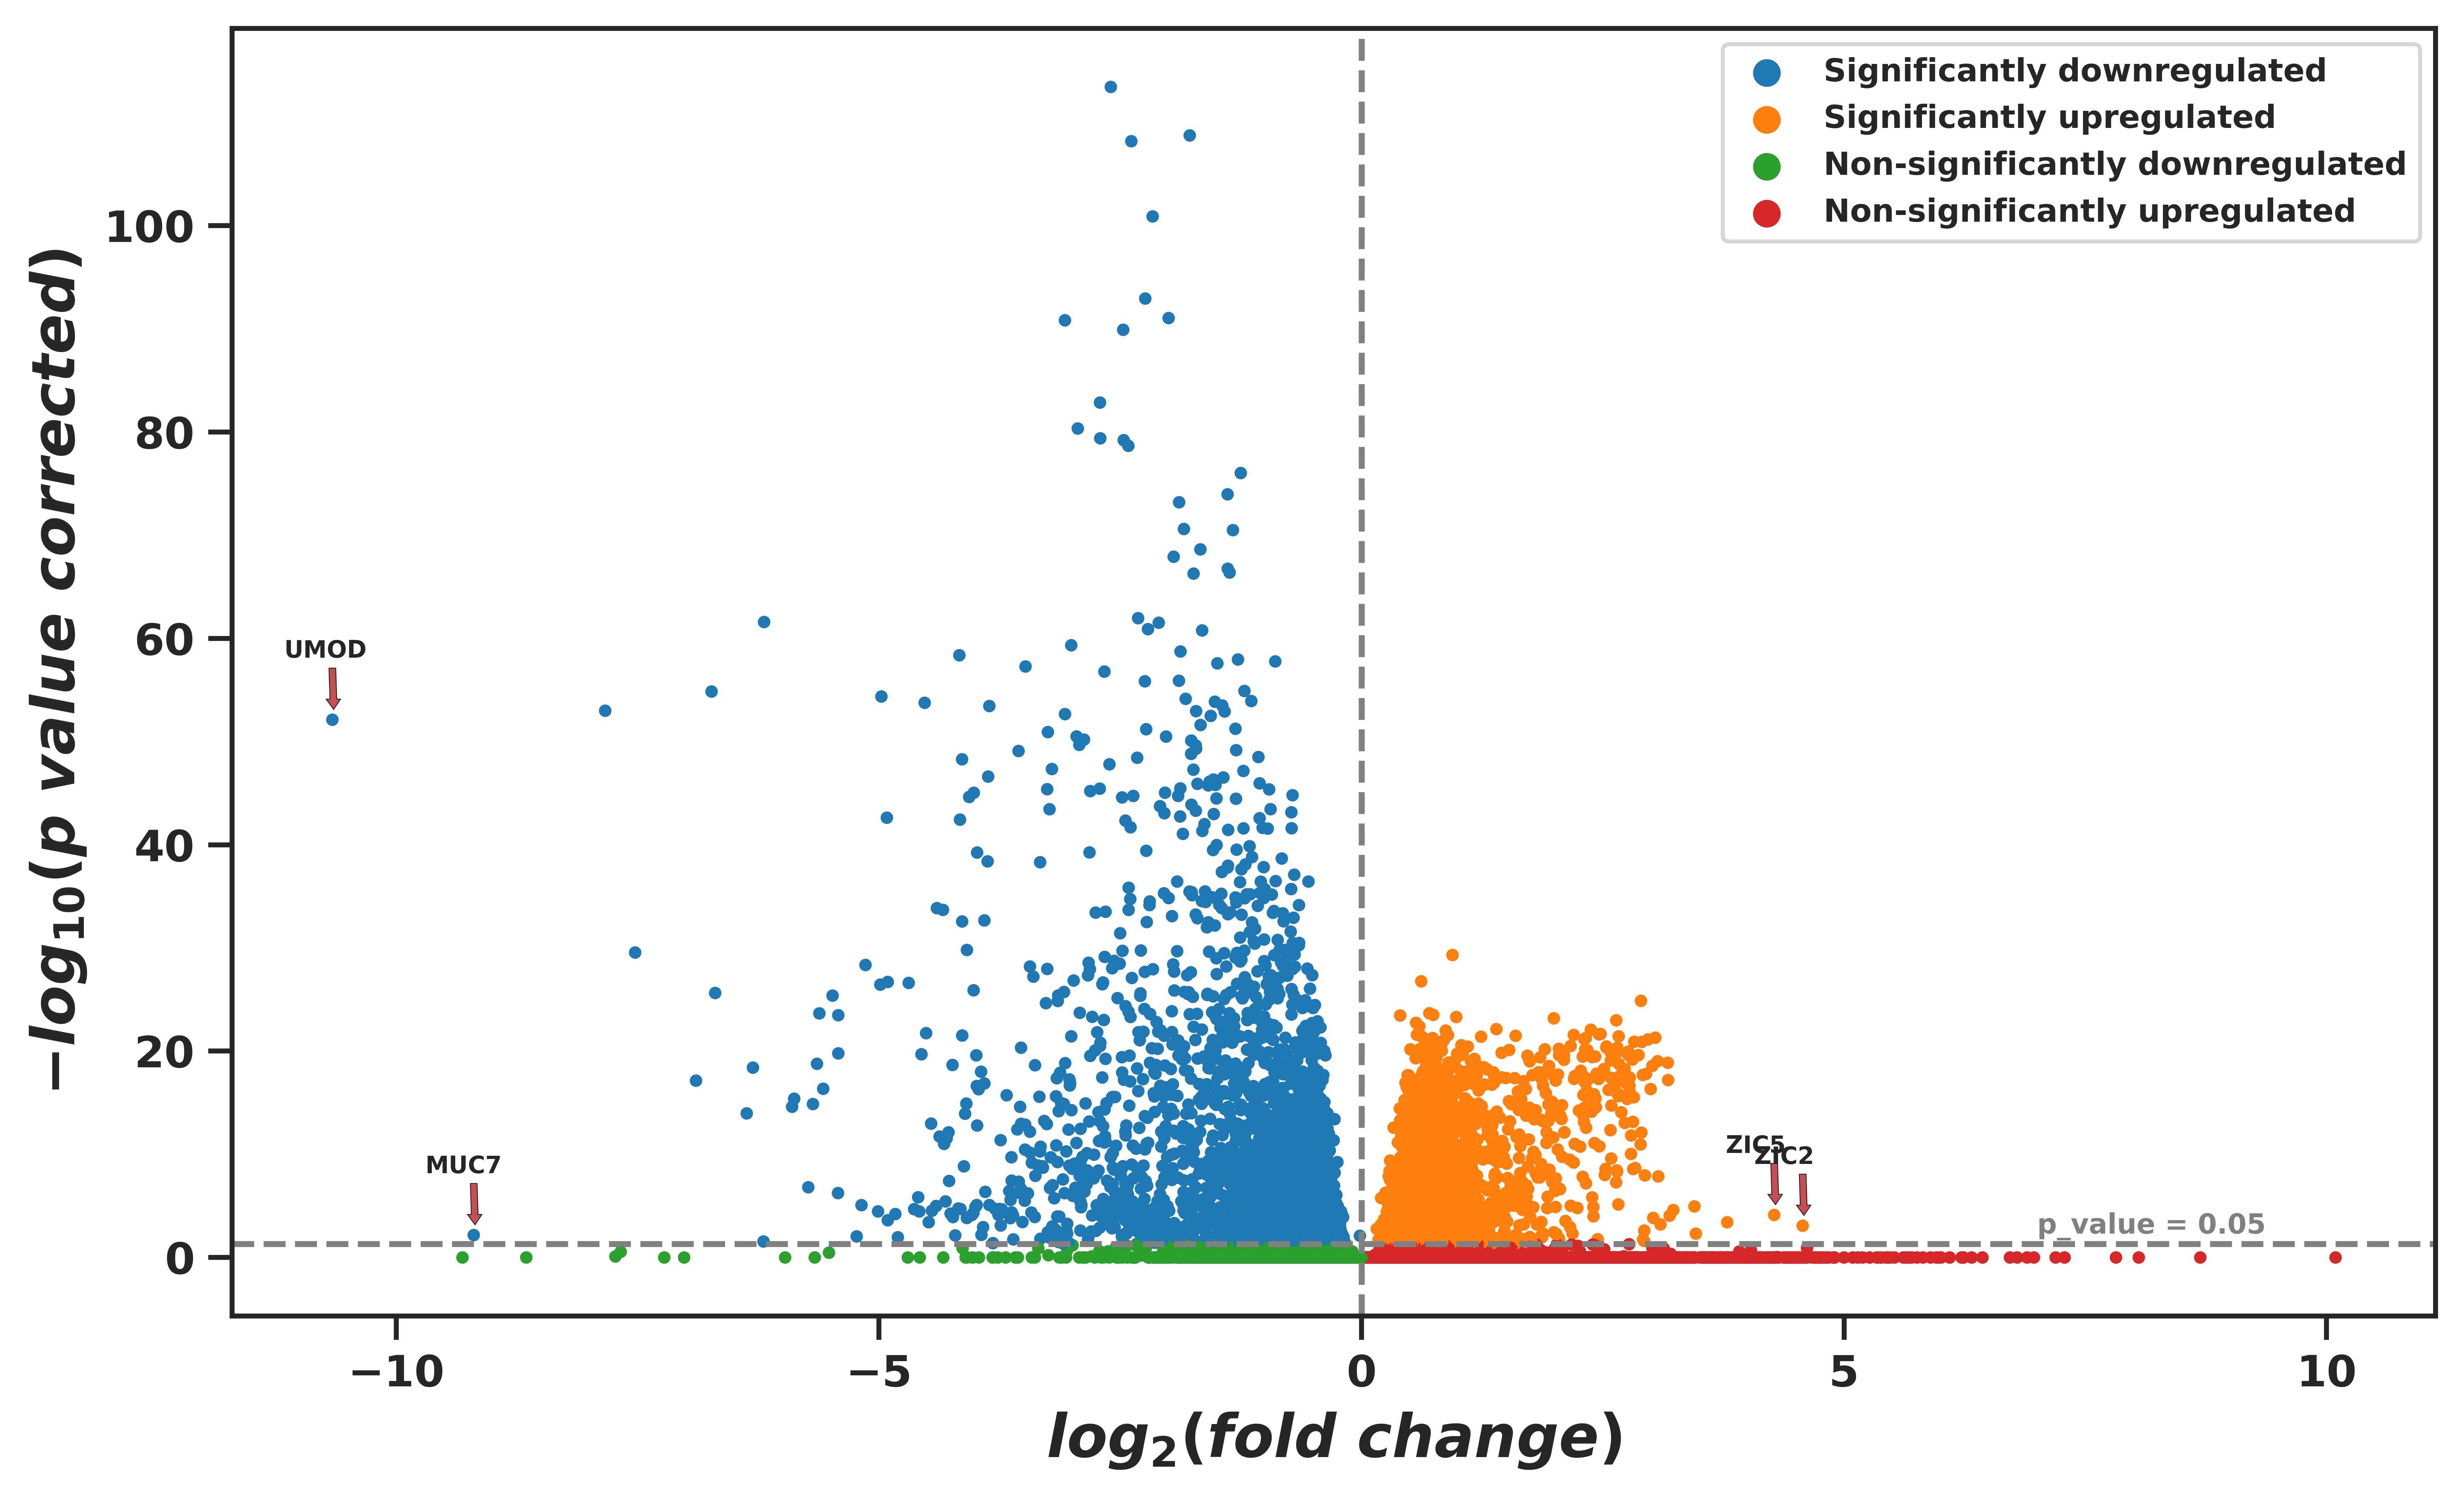

In [ ]:
g = sns.scatterplot(x = diff_expr["logFC"], y = diff_expr["log_pval"],
                    hue = diff_expr["significance"], palette= colors_dict,
                    linewidth=0, s=10)
# hide title in the legend
g.legend_.set_title(None)

# reordering the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [3, 1, 2, 0]
plt.legend([handles[i] for i in order], [labels[i] for i in order], prop={'size': 8})

# adding dashed threshold lines
plt.axvline(0, linestyle = "dashed", color ="grey")
plt.axhline(-math.log10(0.05), linestyle = "dashed", color ="grey")

# annotating the most diff expressed genes
for gene_id in range(4):
    info = top_2_total.iloc[gene_id]
    plt.text(info["logFC"] - 0.5, info["log_pval"] + 6, info["Sample"],
             fontfamily='sans-serif', size=6, weight='extra bold')
    plt.arrow(info["logFC"], info["log_pval"] + 5, dx=0.01, dy=-3, head_width=0.15,
              head_length=1, width=0.07, linewidth=0.2, fc='r', ec='k')
    
# adding the p-value text
plt.text(7, -math.log10(0.05)+1, "p_value = 0.05",  fontfamily='sans-serif',
         weight='bold', color='grey', size=7)

# changing the font of labels
plt.xlabel("$log_2(fold\ change)$", style='italic', fontsize = 15)
plt.ylabel("$-log_{10}(p\ value\ corrected)$", style='italic', fontsize = 15)
plt.show()

### Pie-chart

Data generation:

In [ ]:
pie_data = pd.DataFrame(columns=["Group", "Count"])
groups_list = [f"Group {i}" for i in range(1, 53)]

In [ ]:
total_sum = (125/31.54)*100
percent_list = [8.5, 8.5, 3.8, 2.46, 6.26, 6.94, 8.95, 1.12, 6.94, 1.34, 2.46,
              2.24, 3.13, 0.22, 3.36, 2.24]
count_list = [(per*total_sum)/100 for per in percent_list]
count_list += [27, 19, 8, 7, 4, 4, 4, 4, 3, 3, 3, 3]
count_list += [2]*12
count_list += [1]*12

In [ ]:
pie_data["Group"] = groups_list
pie_data["Count"] = count_list
pie_data.head()

,Group,Count
0,Group 1,33.687381
1,Group 2,33.687381
2,Group 3,15.060241
3,Group 4,9.749524
4,Group 5,24.809765


Data with Others grouped for pie chart:

In [ ]:
pie_data_with_others = pie_data[:16].copy()
others_row = pd.DataFrame(data = {'Group' : ['Others'], 'Count' : [total_sum*0.3154]})
pie_data_with_others = pd.concat([pie_data_with_others, others_row], ignore_index=True)
pie_data_with_others

,Group,Count
0,Group 1,33.687381
1,Group 2,33.687381
2,Group 3,15.060241
3,Group 4,9.749524
4,Group 5,24.809765
5,Group 6,27.504756
6,Group 7,35.470831
7,Group 8,4.438808
8,Group 9,27.504756
9,Group 10,5.310717


Data of Others for hist:

In [ ]:
only_others = pie_data.tail(52-16)

In [ ]:
only_others.shape

(36, 2)

Plotting:

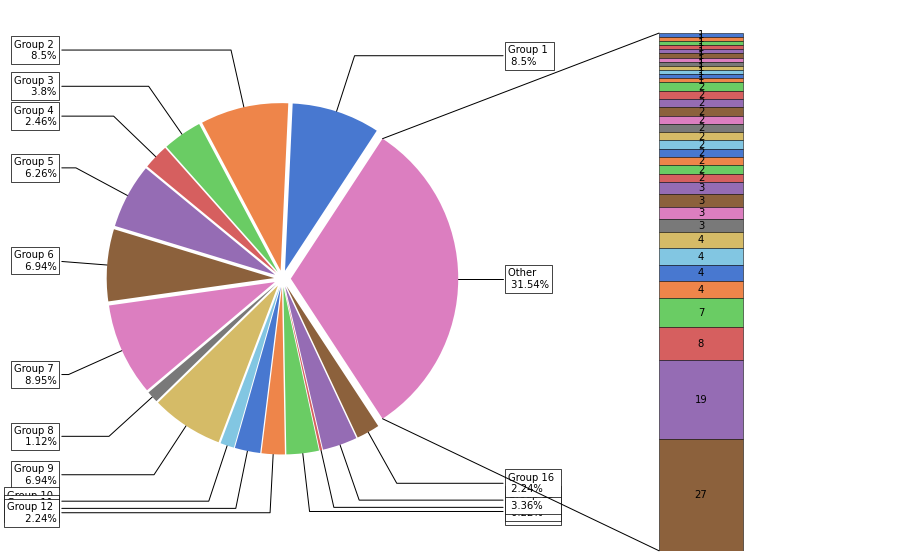

In [ ]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = list(pie_data_with_others["Count"]/total_sum)
explode = [0.05]*17

# define Seaborn color palette to use
palette_color = sns.color_palette('muted')

# rotate so that first wedge is split by the x-axis
angle = -180 * (-0.3154)
wedges, *_ = ax1.pie(overall_ratios, startangle=angle,
                     explode=explode, colors=palette_color)

# bar chart parameters
bar_ratios = list(only_others["Count"]/total_sum)
bar_labels = list(only_others["Group"])
bottom = 1
width = .2

# adding from the top matches the legend
i = 0
for j, (height, label) in enumerate(reversed([*zip(bar_ratios, bar_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=sns.color_palette('muted')[i%10],
                 label=label, edgecolor="black", linewidth=0.5)
    ax2.bar_label(bc, labels=[int(height*total_sum)], label_type='center')
    i+=1


ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[-1].theta1, wedges[-1].theta2
center, r = wedges[-1].center, wedges[-1].r
bar_height = sum(bar_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 3.17*bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 2.17*bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

# labeling the pie chart
labels = [f"{groups_list[i]} \n {str(percent_list[i])}%" for i in range(
        len(percent_list))]+["Other \n 31.54%"]

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


plt.show()

## EDA

In [3]:
covid = pd.read_csv("./Python_BI_2022/HW5/data/owid-covid-data.csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
covid.shape

(220343, 67)

Для начала посмотрим, в каких столбцах есть пропущенные значения:

In [ ]:
covid["human_development_index"].isna().sum()

44243

In [ ]:
for col in covid.columns:
    if covid[col].isna().sum() < covid.shape[0]/2:
        print(col, covid[col].isna().sum())

iso_code 0
continent 12673
location 0
date 0
total_cases 8966
new_cases 9231
new_cases_smoothed 10427
total_deaths 28070
new_deaths 28128
new_deaths_smoothed 29308
total_cases_per_million 9933
new_cases_per_million 10198
new_cases_smoothed_per_million 11389
total_deaths_per_million 29024
new_deaths_per_million 29082
new_deaths_smoothed_per_million 30257
reproduction_rate 54208
new_vaccinations_smoothed 93142
new_vaccinations_smoothed_per_million 93142
new_people_vaccinated_smoothed 93718
new_people_vaccinated_smoothed_per_hundred 93718
stringency_index 54097
population 1284
population_density 24666
median_age 39273
aged_65_older 41186
aged_70_older 40221
gdp_per_capita 39933
extreme_poverty 102678
cardiovasc_death_rate 39752
diabetes_prevalence 30503
female_smokers 83541
male_smokers 85414
hospital_beds_per_thousand 59679
life_expectancy 14475
human_development_index 44243


Видно, что в некоторых строках есть большое количество пропущенных значений. При этом по смыслу многие строки дублируются или имеют прямую корреляцию с другими (например, ISO описывает сразу и страну и континент). Посмотрим поподробнее на столбцы. \\
Оставим только столбцы, где больше половины значений не пустые, плюс которые не дублируют другие строки:

In [4]:
cols = ["iso_code", "date", "total_cases", "new_cases", "total_deaths", "new_deaths", "total_cases_per_million", "new_cases_per_million",
        "total_deaths_per_million", "new_deaths_per_million", "reproduction_rate", "new_vaccinations_smoothed_per_million",
        "stringency_index", "population_density", "median_age", "aged_65_older", "gdp_per_capita", "cardiovasc_death_rate", "female_smokers",
        "male_smokers", "hospital_beds_per_thousand", "life_expectancy", "human_development_index"]

In [5]:
covid.drop(columns = list(set(covid.columns).difference(cols)), inplace=True)

In [ ]:
covid.shape

(220343, 23)

In [ ]:
covid.dtypes

iso_code                                  object
date                                      object
total_cases                              float64
new_cases                                float64
total_deaths                             float64
new_deaths                               float64
total_cases_per_million                  float64
new_cases_per_million                    float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
reproduction_rate                        float64
new_vaccinations_smoothed_per_million    float64
stringency_index                         float64
population_density                       float64
median_age                               float64
aged_65_older                            float64
gdp_per_capita                           float64
cardiovasc_death_rate                    float64
female_smokers                           float64
male_smokers                             float64
hospital_beds_per_th

Для начала посомтрим, сколько есть уникальных стран, сколько есть записей для каждой страны и взвешены ли они:

In [ ]:
len(covid.iso_code.unique()) # всего у нас 244 страны - очень много!

244

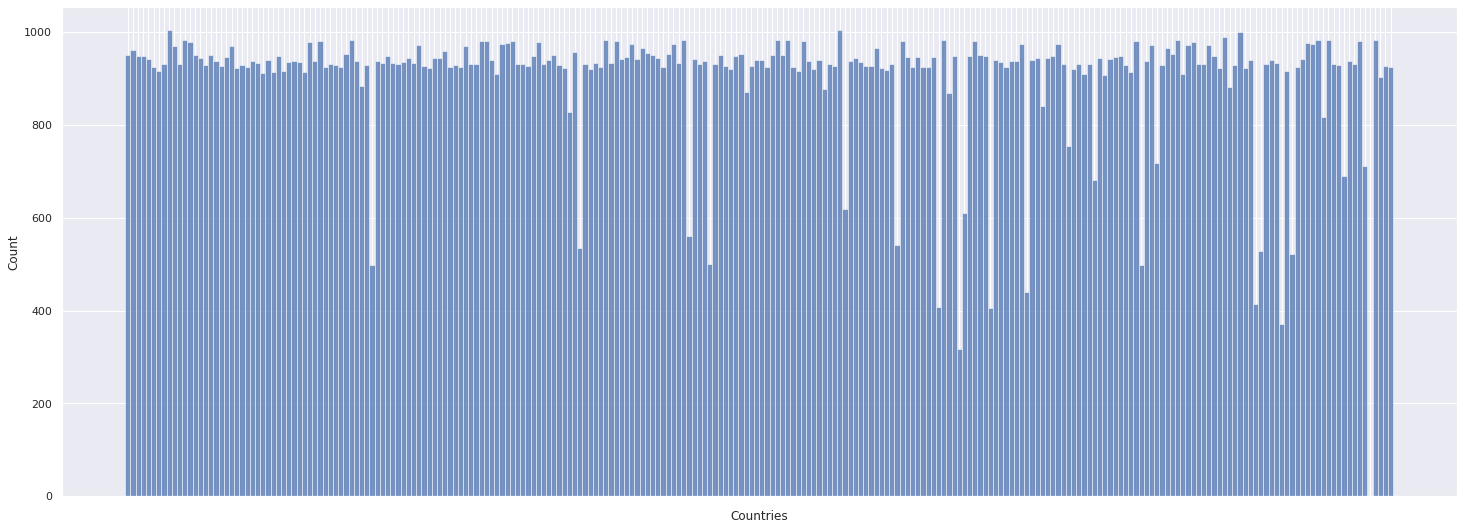

In [ ]:
sns.set(rc={'figure.figsize':(25, 9)})
ax = sns.histplot(data = covid, x = covid.iso_code, stat = "count");
ax.set(xticklabels=[])
ax.set(xlabel="Countries")

plt.show()

Мы можем видеть, что для большинства стран число наблюдений одинаково и равно примерно 900, хотя есть ряд стран, для которых наблюдений сильно меньше.

Гипотеза 1: относительное число больничных коек должно отрицательно кореллировать с относительным числом смертей, поскольку это должно влиять на уход за больными и уменьшать скорость распространения заболевания. Посмотрим на график:

*очевидно, что здесь еще будут сильно влиять другие параметны, но мы упростим сутацию..*

In [ ]:
# we can leave only records of the last day to have the final deaths number
df_total_deaths = covid.groupby("iso_code").last()
df_total_deaths = df_total_deaths.dropna()

df_total_deaths.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,...,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
iso_code,,,,,,,,,,,,,,,,,,,,,
ALB,9/30/2022,332221.0,48.0,3589.0,0.0,116376.445,16.814,1257.221,0.000,0.63,...,104.871,38.0,13.188,11803.431,304.195,7.1,51.2,2.89,78.57,0.795
ARE,9/30/2022,1027502.0,471.0,2345.0,0.0,109715.558,50.293,250.397,0.000,0.89,...,112.442,34.0,1.144,67293.483,317.840,1.2,37.4,1.20,77.97,0.890
ARG,9/30/2022,9708420.0,4482.0,129897.0,42.0,214423.817,98.991,2868.954,0.928,0.97,...,16.177,31.9,11.198,18933.907,191.032,16.2,27.7,5.00,76.67,0.845
AUS,9/30/2022,10239653.0,1231.0,15221.0,50.0,395031.744,47.490,587.205,1.929,1.06,...,3.202,37.9,15.504,44648.710,107.791,13.0,16.5,3.84,83.44,0.944
AUT,10/1/2022,5131527.0,13015.0,20743.0,5.0,575149.052,1458.740,2324.906,0.560,1.30,...,106.749,44.4,19.202,45436.686,145.183,28.4,30.9,7.37,81.54,0.922


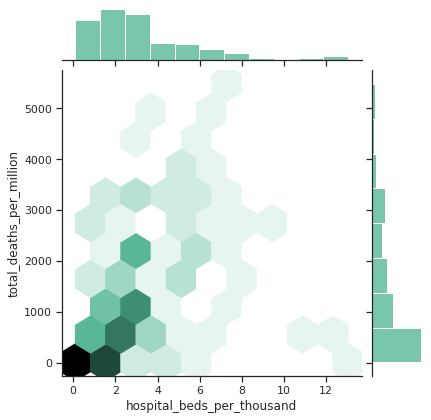

In [ ]:
sns.set_theme(style="ticks")

sns.jointplot(x=df_total_deaths["hospital_beds_per_thousand"],
              y=df_total_deaths["total_deaths_per_million"], kind="hex",
              color="#4CB391");

Мы видим, не смотря на то, что логично было бы предположить, что чем больше больничных коек, тем меньше смертей, оказывается, корреляция обратная: чем меньше больничных коек, тем меньше смертей.

Почему так может произойти? Во-первых, наше распределение смертей и больничных коек сильно смещено в одну сторону, поэтому выборка не очень сбалансирована и у нас просто почти нет наблюдений для большого числа коек + малого количества смертей. Во-вторых, очевидно, что на смертность влияют и другие показатели. 

Гипотеза 1':

По идее, число больничных коек должно быть показателем в целом высокого уровня развития страны и медицины. Проверим, как эти и другие экономические параметры влияют на количество смертей:

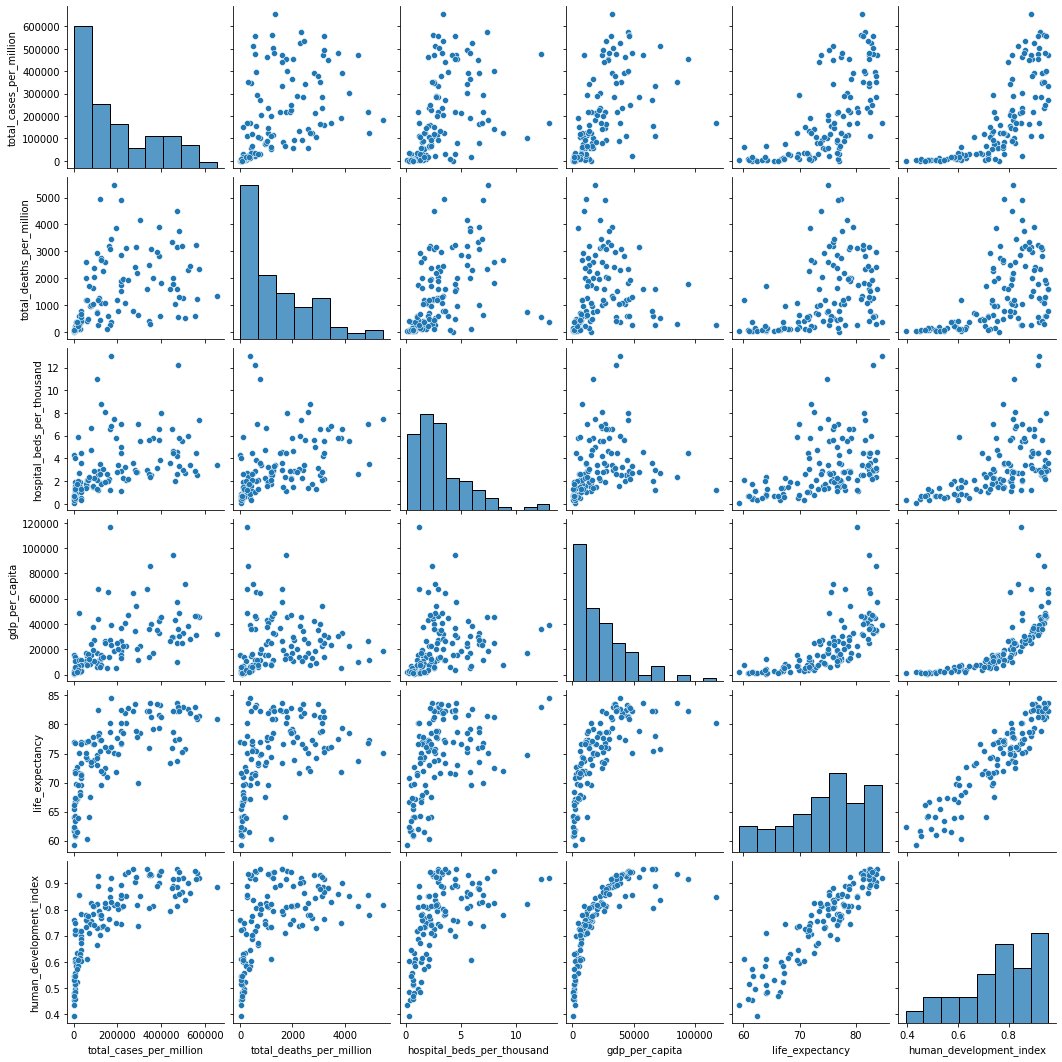

In [ ]:
df_selected = df_total_deaths[["total_cases_per_million", "total_deaths_per_million",
               "hospital_beds_per_thousand", "gdp_per_capita", "life_expectancy",
               "human_development_index"]]
               
sns.pairplot(df_selected);

Из этого графика видно, что:
* общее число случаев, как и ожидается, коррелирует с общей смертностью, хотя для больших значений дисперсия становится очень большой
* при по мере возрастания таких показателей как число больничных коек, ожидаемая продолжительность жизни, ИЧР и ВВП на душу населения, число смертей растет, но по необычной нелинейной траектории. В целом для высокоразвитых стран наблюдается высокая дисперсия в показателях. При этом, можно отметить, что если брать значения от средних до высоких, что будет наблюдаться отрицательноая корреляция с числом смертей.



Гипотеза 2:

Кроме того, очевидно, что на смертность будет влиять состав населения, то есть нужно проверить вклад процента пожилых людей в общую смертность:

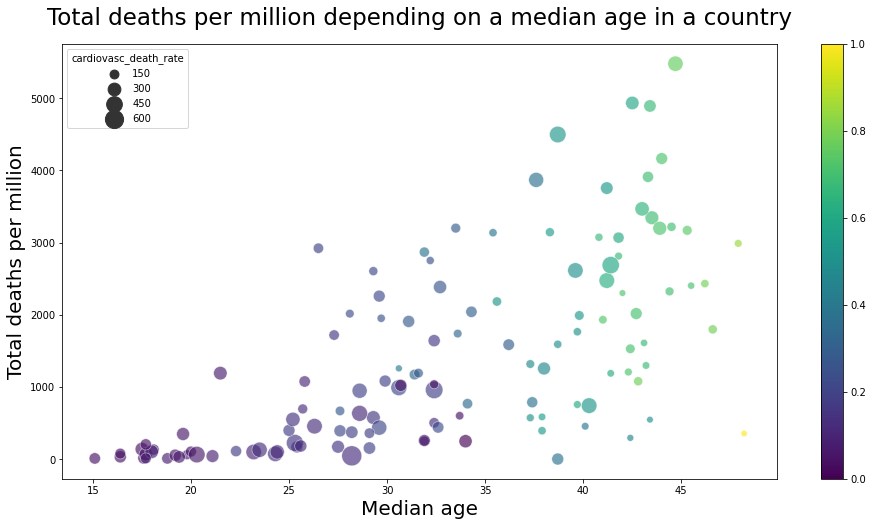

In [ ]:
cols = ["total_cases_per_million", "total_deaths_per_million", "median_age", "aged_65_older", "cardiovasc_death_rate"]

plt.figure(figsize=(16,8))

plots = sns.scatterplot(data=df_total_deaths, x="median_age",
                        y="total_deaths_per_million",
                        c=df_total_deaths["aged_65_older"],
                        size="cardiovasc_death_rate", alpha=0.65, cmap='viridis', 
                        #hue = 'split',
                        #s = (df['interval_size']**2)*50,
                        sizes=(40, 400))

# add a colorbar
bar = plots.get_children()[2] 
plt.colorbar(mappable=bar)

# plot characteristics
plt.title("Total deaths per million depending on a median age in a country", 
          fontsize = 23,  y=1.03)
plt.xlabel("Median age", fontsize = 20)
plt.ylabel("Total deaths per million", fontsize = 20)

plt.show()

Видно, что cardiovascular death rate особо не влияет на общую смертность и не коррелирует с медианным возрастом и числом людей старше 65 лет, что удивительно. При этом, очевидно, что чем больше людей старше 65б тем больше средний возраст.

Гипотеза 3:

Интересно посмотреть на зависимость плотности населения на относительное общее число случаев. Можно предположить, что с в странах с большей плотностью населения, заболевание будет распространяться быстрее. 

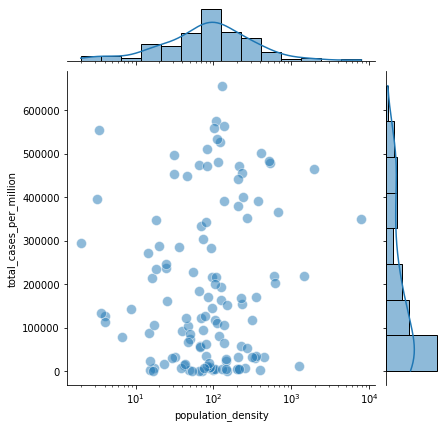

In [ ]:
g = sns.JointGrid(data=df_total_deaths, x="population_density",
                  y="total_cases_per_million")
g.ax_joint.set(xscale="log")

g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)


plt.show()

Видно, что плотность популяции значительно не влияет на число случаев заражения. Исходя из всех построенных зависимостей, закономерно предположить, что как число смертей, так и число случаев будет зависеть от совокупности ряда параметров, при этом ни один из рассмотренных параметров не будет вносить существенный вклад при рассмотрении только его.

Теперь можем немного изучить динамику заболевания во времени.

Построим график новых случаев для 10 первых стран: 

In [6]:
covid['date'] = covid['date'].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))

In [10]:
covid.dtypes

iso_code                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
total_deaths                                    float64
new_deaths                                      float64
total_cases_per_million                         float64
new_cases_per_million                           float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
reproduction_rate                               float64
new_vaccinations_smoothed_per_million           float64
stringency_index                                float64
population_density                              float64
median_age                                      float64
aged_65_older                                   float64
gdp_per_capita                                  float64
cardiovasc_death_rate                           

Удалим все данные по континентам:

In [71]:
covid = covid.drop(covid[covid["iso_code"].str.startswith('OWID', na=False)].index)

Создадим словарь, где ключи - коды стран, а значения - списки значений по дням:

In [99]:
# leaving only nesessary cols
sub_df = covid[["iso_code", "total_cases", "date"]] 
sub_df.fillna(0, inplace=True)

# grouping by country
countries_cases = sub_df.groupby('iso_code')['total_cases'].apply(list)

cc_dict = countries_cases.to_dict()

# sorting the dict so that countries with more deaths in total (sum of all days) are higher
cc_dict = dict(sorted(cc_dict.items(), key=lambda item: sum(item[1])))
print(len(cc_dict[list(cc_dict.keys())[7]]))

840


In [100]:
# the longest list of records
max_value = max(cc_dict.values(), key=len)

# inserting 0 for the missing days
cc_dict_full = {}
for k,v in cc_dict.items():
    if len(v) < len(max_value):
        trailing_zeros = [0]*(len(max_value)-len(v))
        cc_dict_full[k] = trailing_zeros+v
    else:
        cc_dict_full[k] = v

In [101]:
vals = np.vstack(list(cc_dict_full.values())) # y = deaths per day
keys = list(cc_dict_full.keys()) # labels = country name

In [102]:
vals.shape

(229, 1004)

In [109]:
sns.color_palette("magma", n_colors=20)[19]

(0.991332, 0.905763, 0.661309)

In [103]:
dates = [i for i in range(1004)] # x = days 

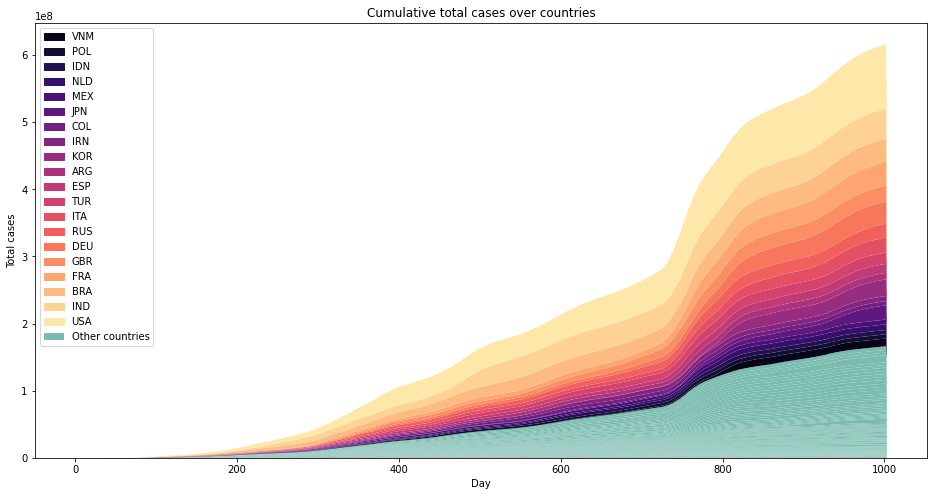

In [116]:
fig, ax = plt.subplots(figsize=(16,8))

# we will color top-20 countries is gradient and all other countries in cyan 
magma = sns.color_palette("magma", n_colors=20)
color_map = [sns.color_palette("light:#5A9", n_colors=5)[3]]*209 + magma

plt.stackplot(dates, vals, labels=keys, colors=color_map)
plt.legend(keys[-20:]+["Other countries"], loc='upper left')#, bbox_to_anchor=(1.1, 1), borderaxespad=0.)
leg = ax.get_legend()
for l in range(1, 21):
    leg.legendHandles[-l-1].set_color(magma[-l])

ax.set_title('Cumulative total cases over countries')
ax.set_xlabel('Day')
ax.set_ylabel('Total cases')

plt.show()